# Module import

In [3]:
## module import without (pip install KrakenOS)

%reload_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

import numpy as np
from KrakenOS.KrakenSys import *
from KrakenOS.RayKeeper import *
from KrakenOS.SetupClass import *
from KrakenOS.SurfClass import *
from KrakenOS.PupilTool import *
from KrakenOS.SurfBlockClass import *
from KrakenOS.LensCat import *

import matplotlib.pyplot as plt

from KrakenOS.LensCat import *

# from KrakenOS.LensCat import zmf_parsing, zmf2dict, zmx_read, cat2surf
# from KrakenOS.OptimTools import *
import os, codecs, io

# from scipy.optimize import basinhopping, NonlinearConstraint, minimize, show_options

import warnings
warnings.filterwarnings('ignore')

# %matplotlib widget

# Function. 1: Manually enter the refractive index, dispersion and alpha

In [4]:
# From Examp_Doublet_Lens.py
P_Obj = surf(Rc=0.0, Thickness=10, Glass='AIR', Diameter=30.0)
L1a = surf(Rc=9.284706570002484E+001, Thickness=6.0, Glass='BK7', Diameter=30.0, Axicon=0)
L1b = surf(Rc=-3.071608670000159E+001, Thickness=3.0, Glass='F2', Diameter=30.0)

# L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='AIR', Diameter=30.0)
# L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass=1, Diameter=30.0)
# L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='nvk 1.0 0 0', Diameter=30.0)
L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='___BLANK 1 0 1.52216 5.88E+1 0 0 0 0 0 0'  , Diameter=30.0)

'''
I added input format for Glass attribute in surf class
Physics.py
KrakenSys.py
file are modified

case I)
as like the original version, input is material name [str]

ex)
L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='AIR', Diameter=30.0)

case II)
as like the original version, input is just refractive index [float, int]

ex)
L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass=1, Diameter=30.0)

case III)
Input is refractive index, dispersion (abbe number) and alpha
wavelength dependency can be corrected by using Abbe number
I refered the dispersion correction equation from 
https://github.com/quartiq/rayopt/blob/master/rayopt/material.py 

format
'nvk <refractive index> <Abbe number> <Alpha>' 

ex) 'nvk 1.0 0 0' [str]
L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='nvk 1.0 0 0', Diameter=30.0)

case IIII)
When implement the zemax lens data, there is a BLANK material that only refractive index and dispersion are recorded
To read that format, I modified code.

reference for the zemax glass data format
https://github.com/nzhagen/zemaxglass/blob/master/ZemaxGlass_user_manual.pdf        
NM <glass_name> <dispersion_formula_number> <MIL> <N(d)> <V(d)> <Exclude_sub> <status> <melf_freq> 

format
'___BLANK 1 0 <refractive index> <Abbe number> 0 0 0 0 0 0' 

ex) '___BLANK 1 0 1.52216 5.88E+1 0 0 0 0 0 0'  
L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='___BLANK 1 0 1.52216 5.88E+1 0 0 0 0 0 0'  , Diameter=30.0)
'''
P_Ima = surf(Rc=0.0, Thickness=0.0, Glass='AIR', Diameter=3.0, Name='Plano imagen')
# ______________________________________#

A = [P_Obj, L1a, L1b, L1c, P_Ima]
config_1 = Setup()

Default catalog is loaded from:  E:\Dropbox\Notebook\programming\python\Kraken-Optical-Simulator\KrakenOS/Cat/
Glass catalog loaded
Loading glass calatogs:


# Function. 2: Add figsize variable to display2d

In [5]:

import numpy as np
P_Obj = surf(Rc=0.0, Thickness=10, Glass='AIR', Diameter=30.0)
L1a = surf(Rc=9.284706570002484E+001, Thickness=6.0, Glass='BK7', Diameter=30.0, Axicon=0)
L1b = surf(Rc=-3.071608670000159E+001, Thickness=3.0, Glass='F2', Diameter=30.0)

# L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='AIR', Diameter=30.0)
# L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass=1, Diameter=30.0)
# L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='nvk 1.0 0 0', Diameter=30.0)
L1c = surf(Rc=-7.819730726078505E+001, Thickness=9.737604742910693E+001, Glass='___BLANK 1 0 1.52216 5.88E+1 0 0 0 0 0 0'  , Diameter=30.0)
P_Ima = surf(Rc=0.0, Thickness=0.0, Glass='AIR', Diameter=3.0, Name='Plano imagen')
# ______________________________________#

A = [P_Obj, L1a, L1b, L1c, P_Ima]
config_1 = Setup()

# ______________________________________#

def R_RMS(L, M, N, X, Y, delta_Z):
    cenX = np.mean(X)
    cenY = np.mean(Y)
    nX = X - cenX
    nY = Y - cenY
    x1 = ((L / N) * delta_Z) + nX
    y1 = ((M / N) * delta_Z) + nY
    R2 = ((x1 * x1) + (y1 * y1))
    R_RMS = np.sqrt(np.mean(R2))
    return R_RMS


# ______________________________________#

def DER_R_RMS(L, M, N, X, Y, delta_Z):
    h = 0.001
    f1 = R_RMS(L, M, N, X, Y, delta_Z + h)
    f2 = R_RMS(L, M, N, X, Y, delta_Z - h)
    der = (f1 - f2) / (2.0 * h)
    return der



Doblete = system(A, config_1)
Rayos1 = raykeeper(Doblete)
Rayos2 = raykeeper(Doblete)
Rayos3 = raykeeper(Doblete)
RayosT = raykeeper(Doblete)

# ______________________________________#

tam = 10
rad = 10.0
tsis = len(A) - 1
for j in range(-tam, tam + 1):
    for i in range(-tam, tam + 1):
        x_0 = (i / tam) * rad
        y_0 = (j / tam) * rad
        r = np.sqrt((x_0 * x_0) + (y_0 * y_0))
        if r < rad:
            tet = 0.0
            pSource_0 = [x_0, y_0, 0.0]
            dCos = [0.0, np.sin(np.deg2rad(tet)), np.cos(np.deg2rad(tet))]
            W = 0.4
            Doblete.Trace(pSource_0, dCos, W)
            Rayos1.push()
            RayosT.push()
            W = 0.5
            Doblete.Trace(pSource_0, dCos, W)
            Rayos2.push()
            RayosT.push()
            W = 0.6
            Doblete.Trace(pSource_0, dCos, W)
            Rayos3.push()
            RayosT.push()

# ______________________________________#

Default catalog is loaded from:  E:\Dropbox\Notebook\programming\python\Kraken-Optical-Simulator\KrakenOS/Cat/
Glass catalog loaded
Loading glass calatogs:


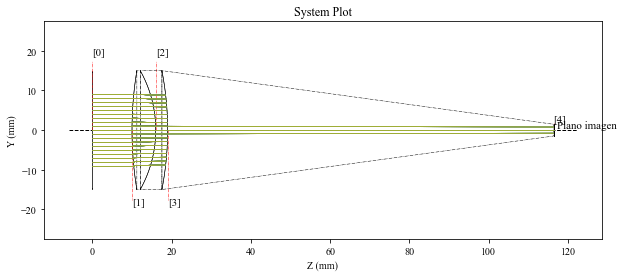

0.0 0.8886809634672521 -0.0024185834324175204
367.4386219453103 0.002374725651949818 6.462915677022535e-06
-0.000127161788441299 0.8886812710186469 -0.0024185834324730315
367.43862193687687 0.0023747256518952885 6.462894897637378e-06
-0.0013085443398495045 0.888684128290913 -0.0024185834324175204
367.4386219453103 0.002374725651949818 6.462915677022535e-06
-0.000127161788441299 0.8886812710186469 -0.0024185834324730315
367.43862193687687 0.0023747256518952885 6.462894897637378e-06
-0.0013085443398495045 0.888684128290913 -0.0024185834324175204
367.4386219453103 0.002374725651949818 6.462915677022535e-06


In [6]:
'''
You can use figsize (Tuple)
'''
display2d(Doblete, RayosT, figsize=(10, 4))

# ______________________________________#

X, Y, Z, L, M, N = RayosT.pick(-1)
dz = 0.0
for i in range(0, 10):
    FdeZ = R_RMS(L, M, N, X, Y, dz)
    derFdeZ = DER_R_RMS(L, M, N, X, Y, dz)
    print(dz, FdeZ, derFdeZ)
    dz = dz - (FdeZ / derFdeZ)

# Function. 3: Load .zmf file catalog (Thorlabs, Edmund optics or etc) 

In [12]:
'''
you can download Edmund Optics and Thorlabs zemax catalog from below

https://www.edmundoptics.eu/products/services/zemax-catalog/
https://www.thorlabs.com/software_pages/ViewSoftwarePage.cfm?Code=Zemax

'''
# after download the catalogs, you have to enter the path in which the catalogs exist
# in my case, file location is home directory
# below code means parent of parent of the Example dir
LENSCAT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)) 

ED_CAT_PATH = os.path.join(LENSCAT_PATH, 'Edmund Optics 2019.ZMF')
THOR_CAT_PATH = os.path.join(LENSCAT_PATH, 'THORLABS.ZMF')

# load lens catalog
cat = zmf2dict([os.path.join(LENSCAT_PATH, ED_CAT), os.path.join(LENSCAT_PATH, THOR_CAT)])


In [13]:
'''
convert catalog to surface list
cat2surf convert the dictionary form of the surfaces to list of surf() class
surflist2dict re-convert the list of surf() class to the catalog dictionary form
'''
surf_list = cat2surf(cat['49104'], inverse=True, Thickness=0, DespY=5, TiltX=30, AxisMove=0)
cat_dictionary = surflist2dict(surf_list)

# Function. 4: Define SurfBlock class to group a surfaces to adjust them as like a single optical component

In [14]:
config = Setup()
def rays_2D(system, angle: float=0, src: List=[-12.5, 12.5], num_rays: int=20,
                wavelength: float=0.55):
    # convert angle degree to radian
    angle = np.deg2rad(angle)
    
    rays = raykeeper(system)
    for src_position in src:
        for ang in np.linspace(-angle, angle, num_rays): # in radian
            dCos = [0.0, np.sin(ang), -np.cos(ang)]
            source = [0, src_position, 0]
            system.Trace(source, dCos, wavelength)
            rays.push()
    return rays

Default catalog is loaded from:  E:\Dropbox\Notebook\programming\python\Kraken-Optical-Simulator\KrakenOS/Cat/
Glass catalog loaded
Loading glass calatogs:


In [17]:
'''
SurfBlock class group the list of surfaces.
The input is surface list or catalog dictionary
When you make the SurfBlock instance, you have to define the name of the group to refer them using alignment function (that will be explained below)
'''
asph = SurfBlock(cat['49104'], inverse=True, name='asphere1', **{'DespY' : 3, 'AxisMove' : 0})
flat = SurfBlock([surf(Diameter=7, Thickness=5), surf(Diameter=7, Thickness=3)], inverse=False, name='flat', **{'DespY' : 3, 'AxisMove' : 0})

'''
in SurfBlock(),
def __call__(self) method is defined to return a list of surfaces which is grouped in SurfBlock() class
After making instance, if you call the instance with parenthesis, it will return a list of surfaces stored in the class
'''
# make asph instance
asph = SurfBlock(cat['49104'], inverse=True, name='asphere1', **{'DespY' : 3, 'AxisMove' : 0})
# return a list of surfaces
print(asph())

'''
you maybe build the system by combining the surf() class and SurfBlock() class
But, the only surf() class can be implemented in the KrakenOS system
So, I made Alignment function to unpack the surfaces in SurfBlock()
'''
# First, make the list that store surf() class and SurfBlock() class
lens_list = [surf(Diameter=7, Thickness=0), # surf() class
             SurfBlock(cat['49104'], inverse=True, name='asphere1', **{'DespY' : 3, 'AxisMove' : 0}), # SurfBlock() class
            SurfBlock(cat['49104'], inverse=False, name='lens0', Thickness=0), # SurfBlock() class
            SurfBlock(cat['67252'], inverse=True, name='lens1', Thickness=0), # SurfBlock() class
            SurfBlock(cat['49104'], inverse=False, name='lens2', Thickness=0), # SurfBlock() class
            surf(Diameter=17.6, Thickness=1.05*np.sqrt(2), Rc=0, Glass='F_SILICA', TiltX=45, AxisMove=0), # surf() class 
            surf(Diameter=17.6, Thickness=10, TiltX=45, AxisMove=0, ShiftY=0), # surf() class 
            surf(Diameter=25.4, Thickness=0)] # surf() class

# if you want to re-define the distance between surfaces or SurfBlock (i.e. lens or filters)
# You can input the Distances[Dict] optionally
# The key of the Distances dict is index (or name) of surf instance (or SurfBlock instance) 
Distances = {0 : 33.72, 'asphere1' : 10.14282592, 'lens0' : 41.4911102, 'lens1' : 10.59216003, 'lens2' : 16.82, 6 : 18.13360847}
             
# this will return the surface list that can be implemented in the KrakenOS system
alignment(lens_list, Distances)

[<KrakenOS.SurfClass.surf object at 0x000002C10162D1C8>, <KrakenOS.SurfClass.surf object at 0x000002C1014C3708>]


source position 0.280 | source size 0.560 | sensor size 1.4 | magnification 2.50 |(mm)


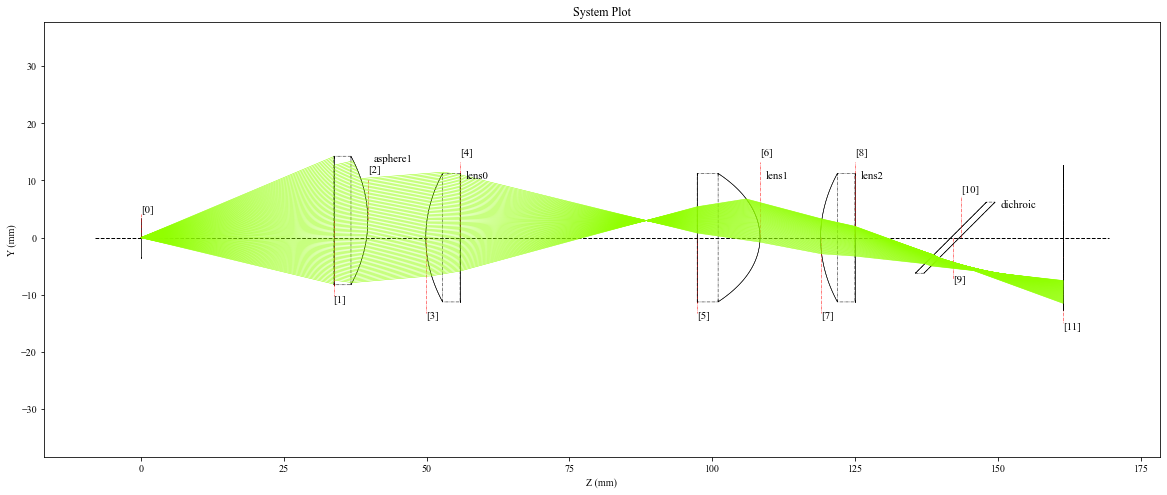

In [18]:
angle = np.rad2deg(np.arcsin(0.6))
lens_list = [surf(Diameter=7, Thickness=0),
             SurfBlock(cat['49104'], inverse=True, name='asphere1', **{'DespY' : 3, 'AxisMove' : 0}),
            SurfBlock(cat['49104'], inverse=False, name='lens0', Thickness=0),
            SurfBlock(cat['67252'], inverse=True, name='lens1', Thickness=0),
            SurfBlock(cat['49104'], inverse=False, name='lens2', Thickness=0),
            surf(Diameter=17.6, Thickness=1.05*np.sqrt(2), Rc=0, Glass='F_SILICA', TiltX=45, AxisMove=0), 
            surf(Diameter=17.6, Thickness=10, TiltX=45, AxisMove=0, ShiftY=0, Name='dichroic'), 
            surf(Diameter=25.4, Thickness=0)]


magnification = 37.5/15
sensor = 1.4
print(f'source position {sensor/magnification/2:.3f} | source size {sensor/magnification:.3f} | sensor size {sensor} | magnification {magnification:.2f} |(mm)')
wavelength = 0.55

'''
Alig
'''
Distances = {0 : 33.72, 'asphere1' : 10.14282592, 'lens0' : 41.4911102, 'lens1' : 10.59216003, 'lens2' : 16.82, 'dichroic' : 18.13360847}
align = system(alignment(lens_list, Distances), config)

# ray tracing
src = [-sensor/magnification/2, 0, sensor/magnification/2]
src = [0]
ray = rays_2D(align, angle, src, num_rays=200, wavelength=wavelength)


fig = display2d(align, ray, figsize=(20, 8))
xlim = [0, 180]
ylim = [-15, 15]

plt.show()